In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = 'NanumGothic'

In [2]:
df_org = pd.read_csv("밀리시타 애정도 설문(응답) - 설문지 응답 시트1.csv")

In [3]:
df_org.head(1)

,타임스탬프,당신의 담당 아이돌은 누구인가요?,밀리시타에 어떻게 유입되었나요?,밀리시타를 얼마나 오랜 기간 플레이 중인가요?,밀리시타에 대한 애정도를 숫자로 표현한다면?,밀리시타를 좋아하는 이유가 무엇인가요?,밀리시타를 접고 복귀한 경험이 있나요?,밀리시타를 접은 경험이 있다면/만약 접게 된다면 그 이유가 무엇이었나요/무엇일까요?,위 질문 중 가장 중요한 이유 한 가지만 선택한다면?,위의 이유에도 불구하고 밀리시타 복귀/계속 하는 이유는?,추첨할 숫자 입력,본인 확인용 답변,밀리언 라이브 IP의 다른 게임이 출시한다면?,아무말 대잔치
0,2023. 6. 9 오후 9:03:30,"아리사, 우미",아이돌마스터 애니(본가),4년 이상 5년 미만 (1주년 이후),5,"아이돌이 예쁘고 귀여워서, 일러스트 및 공식 만화(4컷, 오프샷 등) 퀄리티가 좋아서",없다,"높은 천장 가격 (300뽑), 운영 - 90%를 위한 운영 (성머 위주의 라이브 방...",운영 - 90%를 위한 운영 (성머 위주의 라이브 방송 등),"담당 아이돌을 비롯한 여러 아이돌이 있으니까, 금전적, 시간적 매몰 비용 때문에",6634,나야나,"밀리시타는 계속 하면서, 다른 게임의 장르나 퀄리티에 따라 결정한다.",NaN


In [4]:
df_org.shape

(242, 14)

In [5]:
df = df_org.copy()

In [6]:
color = '#673AB7'

# 담당 아이돌

## 담당 수

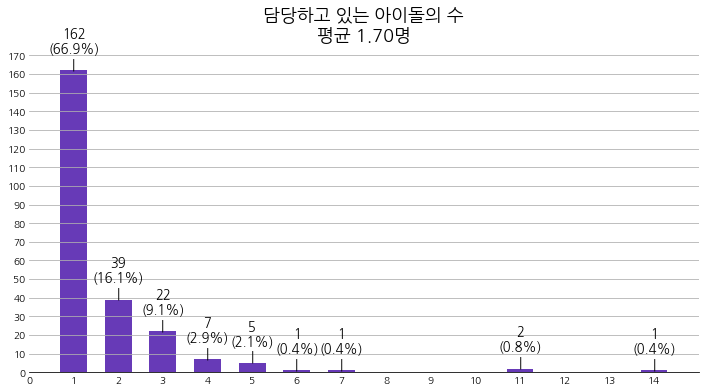

In [7]:
num_idol = df['당신의 담당 아이돌은 누구인가요?'].str.split(',').str.len().value_counts()

x_plot_min = 0
x_plot_max =15


fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
for location in ['right', 'top', 'left']:
    ax.spines[location].set_linewidth(0)
plt.bar(x=num_idol.index, height=num_idol.values, color=color, width=0.6)
plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(num_idol.index, num_idol.values):
    annot = f'{val}\n({val/len(df)*100:.1f}%)\n|'
    plt.annotate(text=annot, xy=(idx, val), ha='center', va='bottom', fontsize=13)

plt.grid(axis='y')
plt.xticks(range(x_plot_min, x_plot_max))
plt.yticks(range(0, max(num_idol) // 10 * 10 + 15, 10))
plt.ylim((0, max(num_idol) // 10 * 10 + 15))
plt.tick_params(length=0)
plt.title(f'담당하고 있는 아이돌의 수\n평균 {(num_idol[num_idol.index < 20] * num_idol[num_idol.index < 20].index).sum() / num_idol[num_idol.index < 20].sum():.2f}명', fontsize=18)
plt.show()

In [8]:
df[df['당신의 담당 아이돌은 누구인가요?'].str.split(',').str.len() >= 20].shape

(2, 14)

## 합승 많은 아이돌

In [9]:
idols = ['하루카', '치하야', '미키', '유키호', '야요이', '마코토', '이오리', '타카네', '리츠코', '아즈사', '아미', '마미', '히비키',
        '미라이', '시즈카', '츠바사', '코토하', '엘레나', '미나코', '메구미', '마츠리', '세리카', '아카네', '안나', '로코', '유리코',
        '사요코', '아리사', '우미', '이쿠', '토모카', '에밀리', '시호', '아유무', '히나타', '카나', '나오', '치즈루', '코노미',
        '타마키', '후카', '미야', '노리코', '미즈키', '카렌', '리오', '스바루', '레이카', '모모코', '줄리아', '츠무기', '카오리']

df_idol_join = df[(df['당신의 담당 아이돌은 누구인가요?'].str.split(',').str.len() > 1) & (df['당신의 담당 아이돌은 누구인가요?'].str.split(',').str.len() < 20)]['당신의 담당 아이돌은 누구인가요?']

In [10]:
idol_join = {idol:0 for idol in idols}

for val in df_idol_join.values:
    val_idols = val.split(', ')
    for val_idol in val_idols:
        idol_join[val_idol] += 1

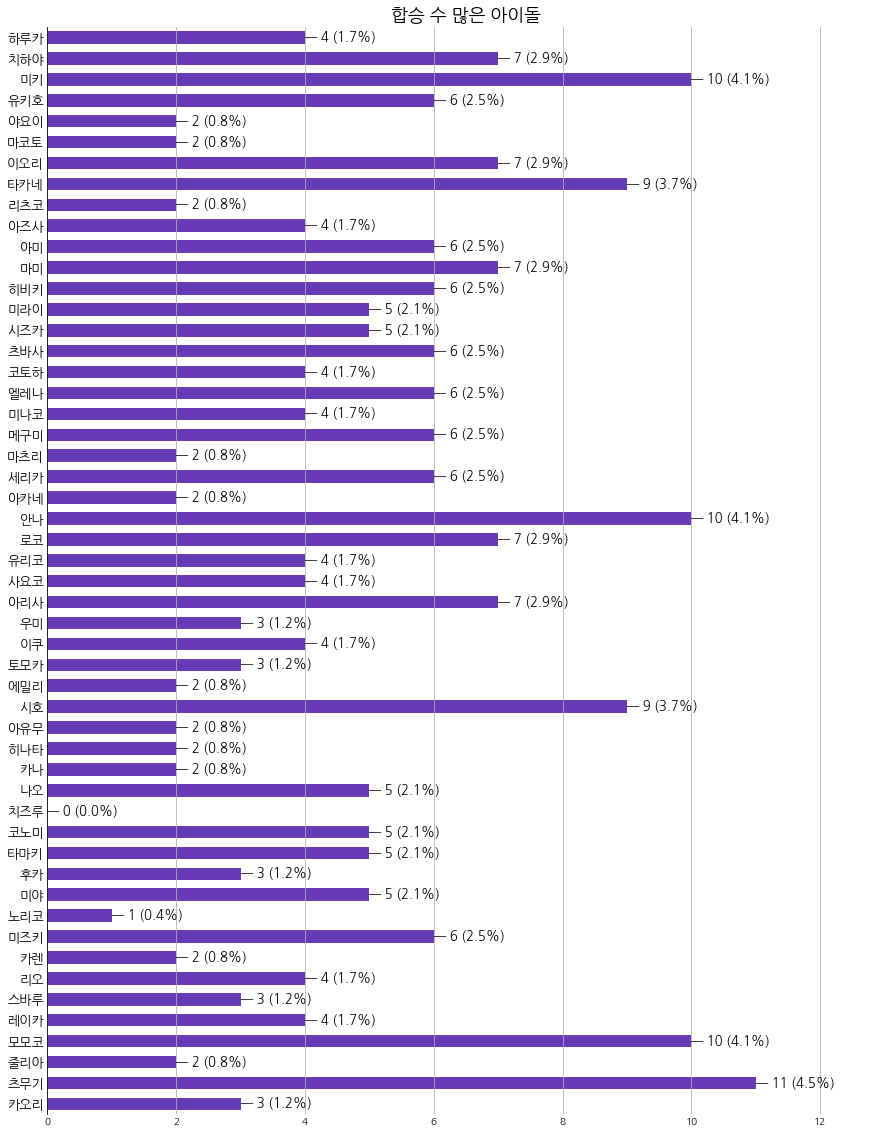

In [11]:
y = list(idol_join.keys())[::-1]
x = list(idol_join.values())[::-1]

fig, ax = plt.subplots(figsize=(15, 20), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
plt.barh(y=y, width=x, color=color, height=0.6)

x_plot_min = 0
x_plot_max = max(x) + 2

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val} ({val/len(df)*100:.1f}%)'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, x_plot_max, 2))
plt.yticks(y, fontsize=13)
plt.ylim((-0.5, len(y)-0.5))
plt.tick_params(length=0)
plt.title(f'합승 수 많은 아이돌', fontsize=18)
plt.show()

## 서로 많이 담당되는 아이돌

In [12]:
from itertools import combinations

idol_cmb = list(combinations(idols, 2))
idol_cmb = [f'{i1}-{i2}' for i1, i2 in idol_cmb]

In [13]:
idol_cmb_dict = {cmb:0 for cmb in idol_cmb}

for val in df_idol_join.values:
    val_idols = val.split(', ')
    val_cmb = list(combinations(val_idols, 2))
    val_cmb = [f'{i1}-{i2}' for i1, i2 in val_cmb]
    for v_cmb in val_cmb:
        idol_cmb_dict[v_cmb] += 1

In [14]:
dict(filter(lambda x:x[1] > 2, idol_cmb_dict.items()))

{'미키-안나': 3,
 '미키-미야': 3,
 '이오리-시호': 3,
 '이오리-모모코': 3,
 '타카네-아즈사': 4,
 '타카네-리오': 3,
 '아미-마미': 4,
 '세리카-안나': 3,
 '안나-유리코': 3,
 '이쿠-모모코': 3,
 '나오-모모코': 3,
 '코노미-모모코': 4,
 '타마키-모모코': 3,
 '모모코-츠무기': 3}

In [15]:
dict(filter(lambda x:x[1] == 2, idol_cmb_dict.items()))

{'치하야-타카네': 2,
 '치하야-시즈카': 2,
 '치하야-메구미': 2,
 '치하야-이쿠': 2,
 '치하야-시호': 2,
 '치하야-모모코': 2,
 '치하야-츠무기': 2,
 '미키-츠바사': 2,
 '미키-엘레나': 2,
 '미키-후카': 2,
 '미키-레이카': 2,
 '미키-츠무기': 2,
 '유키호-로코': 2,
 '유키호-미야': 2,
 '야요이-이오리': 2,
 '야요이-히비키': 2,
 '마코토-아유무': 2,
 '이오리-히비키': 2,
 '이오리-코노미': 2,
 '타카네-시호': 2,
 '타카네-후카': 2,
 '타카네-모모코': 2,
 '타카네-츠무기': 2,
 '타카네-카오리': 2,
 '아즈사-시호': 2,
 '아즈사-후카': 2,
 '아즈사-모모코': 2,
 '아즈사-카오리': 2,
 '마미-미라이': 2,
 '마미-시호': 2,
 '마미-타마키': 2,
 '마미-미야': 2,
 '히비키-로코': 2,
 '히비키-모모코': 2,
 '히비키-츠무기': 2,
 '미라이-츠바사': 2,
 '미라이-엘레나': 2,
 '시즈카-츠무기': 2,
 '츠바사-엘레나': 2,
 '엘레나-메구미': 2,
 '미나코-시호': 2,
 '세리카-유리코': 2,
 '세리카-모모코': 2,
 '아카네-타마키': 2,
 '안나-츠무기': 2,
 '로코-아리사': 2,
 '로코-츠무기': 2,
 '유리코-나오': 2,
 '유리코-모모코': 2,
 '이쿠-코노미': 2,
 '토모카-카렌': 2,
 '시호-후카': 2,
 '시호-모모코': 2,
 '시호-츠무기': 2,
 '나오-코노미': 2,
 '코노미-타마키': 2,
 '코노미-미즈키': 2,
 '타마키-미야': 2,
 '타마키-츠무기': 2,
 '후카-모모코': 2,
 '레이카-츠무기': 2,
 '모모코-카오리': 2}

In [16]:
idol_cmb_dict['에밀리-츠무기']

1

In [17]:
idol_cmb_dict['이쿠-타마키']

1

In [18]:
idol_cmb_dict['안나-로코']

1

## 플레이 기간 - 담당 아이돌 평균

In [19]:
df_play_avg_idol = df[['당신의 담당 아이돌은 누구인가요?', '밀리시타를 얼마나 오랜 기간 플레이 중인가요?']]
df_play_avg_idol['담당수'] = df_play_avg_idol['당신의 담당 아이돌은 누구인가요?'].str.split(',').str.len()
df_play_avg_idol = df_play_avg_idol[df_play_avg_idol['담당수']<20]
df_play_avg_idol_group = df_play_avg_idol.groupby(['밀리시타를 얼마나 오랜 기간 플레이 중인가요?']).mean()[['담당수']]
df_play_avg_idol_group

,담당수
밀리시타를 얼마나 오랜 기간 플레이 중인가요?,
1년 미만 (5주년 이후),1.312500
1년 이상 2년 미만 (4주년 이후),1.482759
2년 이상 3년 미만 (3주년 이후),1.566667
3년 이상 4년 미만 (2주년 이후),1.780488
4년 이상 5년 미만 (1주년 이후),1.741935
5년 이상 (1주년 이전),2.034483
오픈 때부터 계속,1.734375


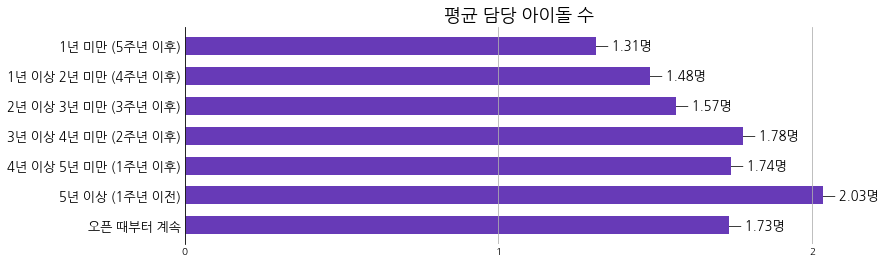

In [20]:
y = list(df_play_avg_idol_group.index)[::-1]
x = list(df_play_avg_idol_group.iloc[:,0].values)[::-1]

fig, ax = plt.subplots(figsize=(12, 4), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
plt.barh(y=y, width=x, color=color, height=0.6)

x_plot_min = 0
x_plot_max = max(x)+0.1

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val:.2f}명'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, int(x_plot_max)+1))
plt.yticks(y, fontsize=13)
plt.tick_params(length=0)

plt.title(f'평균 담당 아이돌 수', fontsize=18)
plt.show()

# 유입

In [21]:
def make_counts_etc(data, column_name, categories):
    """
    설문 항목에서 "기타" 부분을 하나로 묶어, 각 항목들의 개수를 세어주는 함수
    
    
    data: pd.DataFrame
    column_name: 열 이름
    categories: 항목 이름
    """
    import copy
    categories = copy.deepcopy(categories)
    
    if '기타' not in categories:
        categories.append('기타')
        
    counts = {cate:0 for cate in categories}
    etcs = []

    for val in data[column_name].values:
        val_tmp = val
        for cate in categories:
            if cate in val_tmp:
                counts[cate] += 1
                val_tmp = val_tmp.replace(cate, '')

        val_tmp = val_tmp.replace(',', '').strip()
        if len(val_tmp) > 0:
            counts['기타'] += 1
            etcs.append(val_tmp)
            
    return counts, etcs

In [22]:
in_values = ['그리마스', '아이돌마스터 애니(본가)', '아이돌마스터 애니(신데마스)', '아이돌마스터 애니(사이드엠)', '아이돌마스터 애니(U-149)',
            '아이돌마스터 애니(밀리언 라이브) 소식 (vs밀리애니)', '아케마스(2005) ~ 스텔라 스테이지(2017) 사이의 아이마스 콘솔 게임',
            '스탈릿 시즌(2021)', '밀리시타 한국 서버', '신데렐라 걸즈의 IP 게임 (데레스테 등)', '사이드엠 IP의 게임', 
            '샤이니 컬러즈 IP의 게임', '리듬 게임 찾다가', '씹덕 게임 찾다가', '커뮤니티(디시, 아카라이브 등) 유입 (타갤에서 짤이나 디시콘 등으로)',
            '기타']

in_counts, etcs = make_counts_etc(df, '밀리시타에 어떻게 유입되었나요?', in_values)

In [23]:
in_counts

{'그리마스': 18,
 '아이돌마스터 애니(본가)': 126,
 '아이돌마스터 애니(신데마스)': 24,
 '아이돌마스터 애니(사이드엠)': 1,
 '아이돌마스터 애니(U-149)': 0,
 '아이돌마스터 애니(밀리언 라이브) 소식 (vs밀리애니)': 3,
 '아케마스(2005) ~ 스텔라 스테이지(2017) 사이의 아이마스 콘솔 게임': 29,
 '스탈릿 시즌(2021)': 24,
 '밀리시타 한국 서버': 57,
 '신데렐라 걸즈의 IP 게임 (데레스테 등)': 33,
 '사이드엠 IP의 게임': 0,
 '샤이니 컬러즈 IP의 게임': 2,
 '리듬 게임 찾다가': 26,
 '씹덕 게임 찾다가': 24,
 '커뮤니티(디시, 아카라이브 등) 유입 (타갤에서 짤이나 디시콘 등으로)': 23,
 '기타': 44}

In [24]:
for etc in etcs:
    print(etc)

배우기
동방이랑 페이트 맛보다가 3대장인 아이마스는 뭘까...하고 찍어먹으려다 풍덩빠죴음
나무위키 조타 광고
떡인지
노래듣고 유입
인방
유튜브 방송
친구
어쩌다 무료연 준다길래 듣고 시작함
친구가 추천해줘서
지인의 권유
믿갸지지 않겠지만 아이돌마스터 KR
노래
옛날에 유튜브에서 노래듣고 유입
군대에서 나온 소식듣고 전역후 짬짬히시작
태고의 달인 키라메키라리
지인이 하는거 보고 시작함
아즈사씨를 보고 한눈에 반함
친구권유
형의 추천으로 유입
지인
친구추천
유튜브
지인 추천
코로나 시기 할거없어서 애니마스보고 감동받아 조타를 찾아서 깔게됨
꺼라위키 유입
머독
인방
노래찾다 붙잡힘
친구놈이 1주년 무료연 뽑아보래서 시작
음악 자동재생
지인 추천
어디선가 라액 주워듣고 잊혀지질 않아서 가사 검색으로 찾고 노래듣다가 한섭 유입
대학동아리선배
친구의 세뇌
트위치
노래
노래
친구유입
푸치마스
머독방송
머독 방송
방도리하다가 옆집겜 나와서 출시일부터 달림
굿즈샵에서 아크릴 키링을 샀는데 그게 아카네였고 그대로 밀리 유입


- 친구, 지인 14
- 인방, 유튜브 8
- 노래 8
- 나무위키 2
- 배우기
- 동방이랑 페이트 맛보다가 3대장인 아이마스는 뭘까...하고 찍어먹으려다 풍덩빠죴음
- 떡인지
- 어쩌다 무료연 준다길래 듣고 시작함
- 믿갸지지 않겠지만 아이돌마스터 KR
- 군대에서 나온 소식듣고 전역후 짬짬히시작
- 태고의 달인 키라메키라리
- 아즈사씨를 보고 한눈에 반함
- 코로나 시기 할거없어서 애니마스보고 감동받아 조타를 찾아서 깔게됨
- 푸치마스
- 방도리하다가 옆집겜 나와서 출시일부터 달림
- 굿즈샵에서 아크릴 키링을 샀는데 그게 아카네였고 그대로 밀리 유입

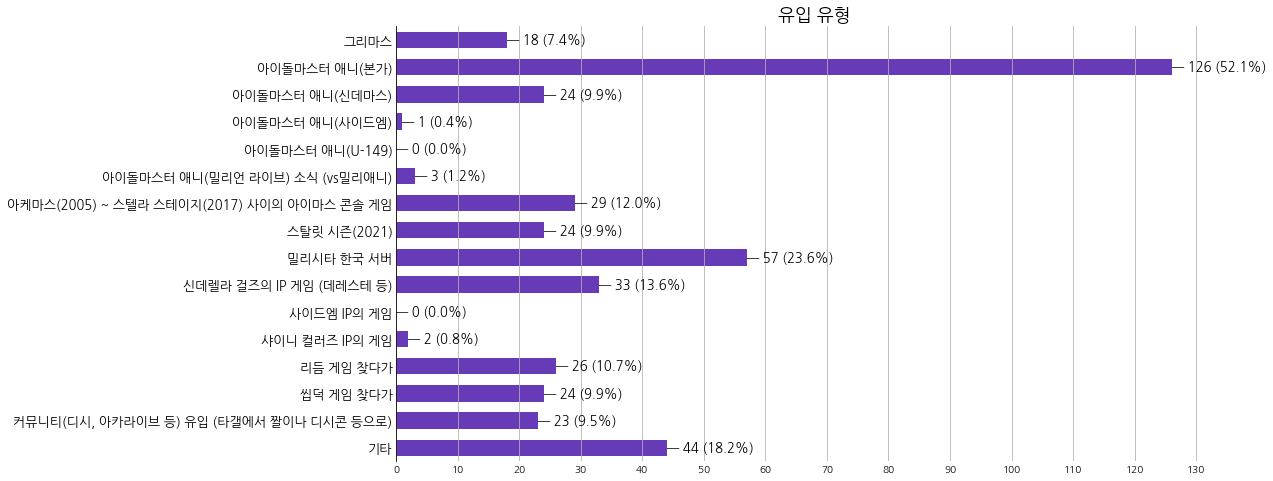

In [25]:
y = list(in_counts.keys())[::-1]
x = list(in_counts.values())[::-1]

fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
    
plt.barh(y=y, width=x, color=color, height=0.6)

x_plot_min = 0
x_plot_max = max(x) + 10

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val} ({val/len(df)*100:.1f}%)'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, x_plot_max, 10))
plt.yticks(y, fontsize=13)
plt.ylim((-0.5, len(y)-0.5))
plt.tick_params(length=0)

plt.title(f'유입 유형', fontsize=18)
plt.show()

# 애정도 점수

In [26]:
df_play = df_org.copy()

In [27]:
df_play['밀리시타에 대한 애정도를 숫자로 표현한다면?'].mean()

7.644628099173554

## 플레이 기간 - 애정도 관계

In [28]:
df_play_group = df_play.groupby(['밀리시타를 얼마나 오랜 기간 플레이 중인가요?']).mean()[['밀리시타에 대한 애정도를 숫자로 표현한다면?']]
df_play_group

,밀리시타에 대한 애정도를 숫자로 표현한다면?
밀리시타를 얼마나 오랜 기간 플레이 중인가요?,
1년 미만 (5주년 이후),8.058824
1년 이상 2년 미만 (4주년 이후),8.000000
2년 이상 3년 미만 (3주년 이후),7.600000
3년 이상 4년 미만 (2주년 이후),8.000000
4년 이상 5년 미만 (1주년 이후),7.281250
5년 이상 (1주년 이전),7.517241
오픈 때부터 계속,7.406250


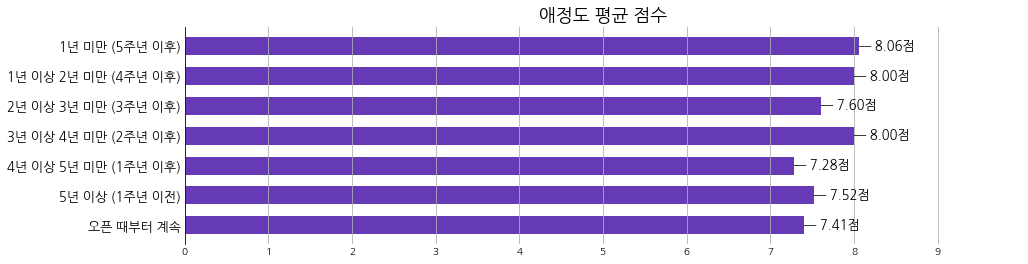

In [29]:
y = list(df_play_group.index)[::-1]
x = list(df_play_group.iloc[:,0].values)[::-1]

fig, ax = plt.subplots(figsize=(15, 4), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
plt.barh(y=y, width=x, color=color, height=0.6)

x_plot_min = 0
x_plot_max = 10

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val:.2f}점'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, x_plot_max))
plt.yticks(y, fontsize=13)
plt.tick_params(length=0)

plt.title(f'애정도 평균 점수', fontsize=18)
plt.show()

In [30]:
pd.pivot_table(data=df_play, index='밀리시타를 얼마나 오랜 기간 플레이 중인가요?', columns='밀리시타에 대한 애정도를 숫자로 표현한다면?', aggfunc='count', values='타임스탬프').fillna(0).astype(int)

밀리시타에 대한 애정도를 숫자로 표현한다면?,1,2,3,4,5,6,7,8,9,10
밀리시타를 얼마나 오랜 기간 플레이 중인가요?,,,,,,,,,,
1년 미만 (5주년 이후),0,0,0,0,2,1,3,4,2,5
1년 이상 2년 미만 (4주년 이후),1,0,0,0,2,4,2,6,5,9
2년 이상 3년 미만 (3주년 이후),0,0,1,1,4,3,3,6,6,6
3년 이상 4년 미만 (2주년 이후),0,0,0,2,3,2,6,10,9,9
4년 이상 5년 미만 (1주년 이후),2,1,0,0,2,3,5,11,2,6
5년 이상 (1주년 이전),0,0,2,1,2,0,7,9,3,5
오픈 때부터 계속,2,1,1,4,6,6,9,11,6,18


# 좋아하는 이유

In [31]:
like_values = ['아이돌이 예쁘고 귀여워서', '아이돌 및 이벤트 커뮤가 재미있어서', '일러스트 및 공식 만화(4컷, 오프샷 등) 퀄리티가 좋아서',
               '다양한 곡이 있어서, 노래가 좋아서', '리듬 게임에 흥미를 느껴서 (채보, 스코어링 등)', '꾸준한 곡 업데이트가 있어서', '기타']

like_counts, etcs = make_counts_etc(df, '밀리시타를 좋아하는 이유가 무엇인가요?', like_values)

In [32]:
like_counts

{'아이돌이 예쁘고 귀여워서': 218,
 '아이돌 및 이벤트 커뮤가 재미있어서': 29,
 '일러스트 및 공식 만화(4컷, 오프샷 등) 퀄리티가 좋아서': 41,
 '다양한 곡이 있어서, 노래가 좋아서': 176,
 '리듬 게임에 흥미를 느껴서 (채보, 스코어링 등)': 28,
 '꾸준한 곡 업데이트가 있어서': 75,
 '기타': 24}

In [33]:
for etc in etcs:
    print(etc)

솔로컴온
담당
데레보단 과금 유도가 덜함
노래 좋고 리겜이여서 재밌음
타카네가 살아 움직이는 갓겜
안무
담당
담당이 여기에만 있어요
치하야가 나오는 모바일게임이라
담당이 여기 갇혀있어요
내 담당이 거기 있어서
느긋함
토요카와 후카
이벤트 달리는게 재밌음
담당이 나오는 게임이라서 하는 게 크다.
오토가 있어서
담당이 여기갇혀있어서
저는 밀리시타를 좋아하지 않습니다
담당이 있어서
담당이 제일 좋아
아이돌마스터여서
의상 예쁜거도 많음
그리는 망했는데 담당은 거기에 있어서
미라이가 귀여워서


- 담당 14
    - 토요카와 후카
    - 미라이가 귀여워서
    - 치하야가 나오는 모바일게임이라
    - 타카네가 살아 움직이는 갓겜
- 솔로컴온
- 데레보단 과금 유도가 덜함
- 노래 좋고 리겜이여서 재밌음
- 안무
- 느긋함
- 이벤트 달리는게 재밌음
- 오토가 있어서
- 저는 밀리시타를 좋아하지 않습니다
- 아이돌마스터여서
- 의상 예쁜거도 많음

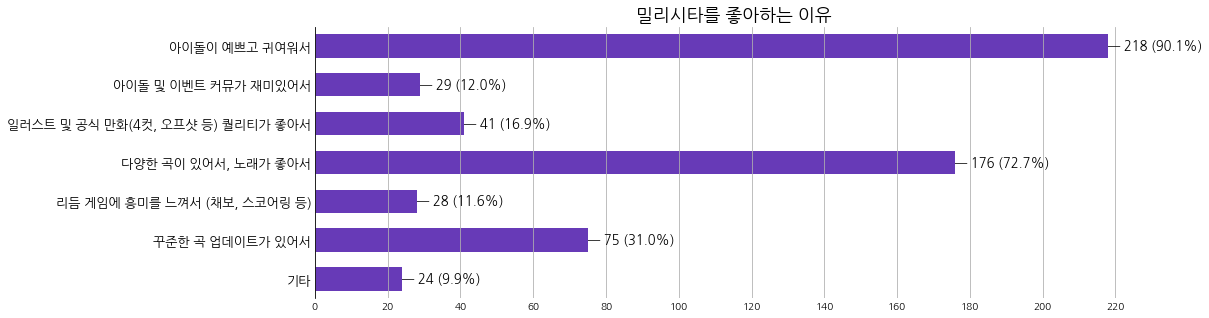

In [34]:
y = list(like_counts.keys())[::-1]
x = list(like_counts.values())[::-1]

fig, ax = plt.subplots(figsize=(15, 5), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
plt.barh(y=y, width=x, color=color, height=0.6)

x_plot_min = 0
x_plot_max = max(x) + 12

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val} ({val/len(df)*100:.1f}%)'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, x_plot_max, 20))
plt.yticks(y, fontsize=13)
plt.ylim((-0.5, len(y)-0.5))
plt.tick_params(length=0)

plt.title(f'밀리시타를 좋아하는 이유', fontsize=18)
plt.show()

# 접었던 경험 - 애정도 관계

In [35]:
df.groupby(['밀리시타를 접고 복귀한 경험이 있나요?']).mean()[['밀리시타에 대한 애정도를 숫자로 표현한다면?']]

,밀리시타에 대한 애정도를 숫자로 표현한다면?
밀리시타를 접고 복귀한 경험이 있나요?,
없다,7.923567
있다,7.129412


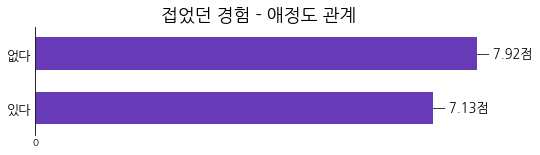

In [36]:
scores_dict = df.groupby(['밀리시타를 접고 복귀한 경험이 있나요?']).mean()['밀리시타에 대한 애정도를 숫자로 표현한다면?'].to_dict()

y = list(scores_dict.keys())[::-1]
x = list(scores_dict.values())[::-1]

fig, ax = plt.subplots(figsize=(8, 2), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
plt.barh(y=y, width=x, color=color, height=0.6)

x_plot_min = 0
x_plot_max = int(max(x)) + 1

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val:.2f}점'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, x_plot_max, 20))
plt.yticks(y, fontsize=13)
plt.ylim((-0.5, len(y)-0.5))
plt.tick_params(length=0)

plt.title(f'접었던 경험 - 애정도 관계', fontsize=18)
plt.show()

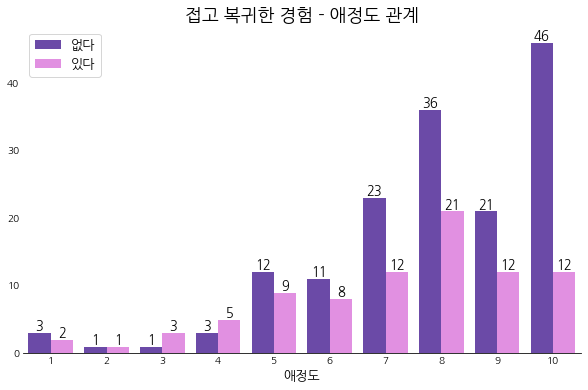

In [37]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
for location in ['right', 'top', 'left']:
    ax.spines[location].set_linewidth(0)
ax = sns.countplot(x='밀리시타에 대한 애정도를 숫자로 표현한다면?', hue='밀리시타를 접고 복귀한 경험이 있나요?', data=df, palette=[color, 'violet'])
for container in ax.containers:
    ax.bar_label(container, fontsize=13)
plt.xlabel('애정도', fontsize=13)
plt.ylabel('')
plt.legend(fontsize=13, loc='upper left')
plt.tick_params(length=0)
plt.title('접고 복귀한 경험 - 애정도 관계', fontsize=18)
plt.show()

# 밀리시타를 접게 되는 이유

In [38]:
dislike_values = [
    '낮은 가챠 확률 (SHS, 한정 가챠(페어/염색) 등)', '높은 천장 가격 (300뽑)', '아이돌 차별 - SSR, 이벤트 등 의상', '아이돌 차별 - 헤어(SHS) 퀄리티 차이',
    '아이돌 차별 - 긴 이벤트 간격 (상위 기준)', '아이돌 차별 - 내부 컨텐츠 차별 (가챠 간격, 주년 키비주얼, 배역 투표 등)', '아이돌 차별 - 외부 컨텐츠 차별 (콜라보, VOY@GER 등 곡 참가, 스탈릿 시즌 등)',
    '운영 - 90%를 위한 운영 (성머 위주의 라이브 방송 등)', '운영 - 재투자 (밀리 애니 퀄리티, 노말 일러스트 굿즈 등)', '운영 - 재미 없는 이벤트 (노가다성)', 
    '운영 - 재미 없는 커뮤', '운영 - 모델링 등 그 외 인게임 문제', '씹타갤 영차 당해서 (갤질용)', '섭종까지 계속 할 예정이다.', '기타'
]

dislike_counts, etcs = make_counts_etc(df, '밀리시타를 접은 경험이 있다면/만약 접게 된다면 그 이유가 무엇이었나요/무엇일까요?', dislike_values)

In [39]:
dislike_counts

{'낮은 가챠 확률 (SHS, 한정 가챠(페어/염색) 등)': 27,
 '높은 천장 가격 (300뽑)': 50,
 '아이돌 차별 - SSR, 이벤트 등 의상': 17,
 '아이돌 차별 - 헤어(SHS) 퀄리티 차이': 19,
 '아이돌 차별 - 긴 이벤트 간격 (상위 기준)': 24,
 '아이돌 차별 - 내부 컨텐츠 차별 (가챠 간격, 주년 키비주얼, 배역 투표 등)': 29,
 '아이돌 차별 - 외부 컨텐츠 차별 (콜라보, VOY@GER 등 곡 참가, 스탈릿 시즌 등)': 13,
 '운영 - 90%를 위한 운영 (성머 위주의 라이브 방송 등)': 74,
 '운영 - 재투자 (밀리 애니 퀄리티, 노말 일러스트 굿즈 등)': 71,
 '운영 - 재미 없는 이벤트 (노가다성)': 65,
 '운영 - 재미 없는 커뮤': 23,
 '운영 - 모델링 등 그 외 인게임 문제': 34,
 '씹타갤 영차 당해서 (갤질용)': 3,
 '섭종까지 계속 할 예정이다.': 102,
 '기타': 60}

In [40]:
for etc in etcs:
    print(etc)

군대
다른 가챠게임들처럼 숙제처럼 느껴져서 잠시 접었음
공식한테 접음당했음
글로벌 서버 서비스 종료 일섭계정 연동 날려먹어서
갤에서 떡밥 지랄나서
안접음
@는 다같이 하하깔깔하는 ip고 그 분위기가 좋고 내 담당도 있어서 빤건데 범죄때 그냥 서로 싸우고 갈드컵하고 담당끼리 감정생기는 그런 환경 조성되는게 너무싫었음 그냥
훈련소 1달
조타 섭종을 좆같이 해서
노래퀄리티가 안좋아지면 재미가없어질지도
굿슬립
글로벌 서버 서비스 종료
봊괄 시발련이 생각없이 운영해서
현생을 살았읍니다
한섭 망해서 화나서 접었음
사실 운영 이라고 하기엔 4주년 직전엔 컨텐츠의 질이 꽤 나빠져서 자연스럽게 나간 애들이 많았지
리듬게임임에도 불구하고 많이 쉬운 난이도
조타 섭종해서
아직안접었는데 요새 겜꼬라지보면 접고싶음
아이돌삼국지 내주ㅜ
훈련소 간다고 잠깐 못했었다
현생이 바빠져서
돈 궁해서 계정 팜
서비스 오픈 당시 부족했던 컨텐츠
예전에 제대로 안 했음
군대가서 권태기 왔었음 한섭 마지막이벤 달리다 섭종공지 떴을때
군대 시발
내가 바빠서
이벤런 파킨
훈련소
씹레랑 말딸하느라 접음 폰 기종이 예전꺼라 로딩때문에 접은것도 있고
지갑이 칼들고 협박함
학생때 공부 때문에
좋은 노래가 안나오면
히나타의 SHS가 나오기 전까지는 대깨씹이었는데 출시 이후 애정이 거의 사라짐
리듬게임으로서 난이도가 너무 평이하다.
조타 섭종
치하야 가슴사이즈 증가
글섭하다가 섭종당함
좆목
총체적 난국
연속으로 통상에 천장박고 현타옴
조타가문을닫아서
입대
조타 섭종
현생이 바빠져서
군지
게임 자체가 질려서
현생
한섭 섭종 현자타임
섭종때문에
한섭 망하고 강제 접음 당하니까 현타와서 한동안 안 했다가 못 잊어서 일섭 복귀
그냥 이샛기들은 운영을 못함 ㅅㅂ련들
운영픽 캐릭터랑 운영에서 버린 캐릭터의 컨셉 의상 디자인퀄리티 차이가 심하고 담당 짬처리 계속 당하니까 게임에 흥미잃음
한섭 종료
공부
아이디연동
한섭 2주년 달리고 섭종당했더니 현타 씨게와서 2달 쉬었음
현생
리겜만 계속하기 지루함 그렇다고 영업돌리고 오토딸깍

- 조타 15
- 군대 8
- 현생 8
- 운영 6
- 숙제처럼 느껴져서, 질려서 3
- 갤창나서, 투표범죄 2
- 리듬게임인데 쉬운 난이도 2
- 공부 2
- 노래 퀄리티가 안 좋아지면 2
- 아이디연동 2

- 굿슬립
- 안접음
- 아이돌삼국지 내주ㅜ
- 예전에 제대로 안 했음
- 이벤런 파킨
- 씹레랑 말딸하느라 접음 폰 기종이 예전꺼라 로딩때문에 접은것도 있고
- 히나타 SHS
- 치하야 가슴사이즈 증가
- 좆목
- 총체적 난국
- 연속으로 통상에 천장박고 현타옴

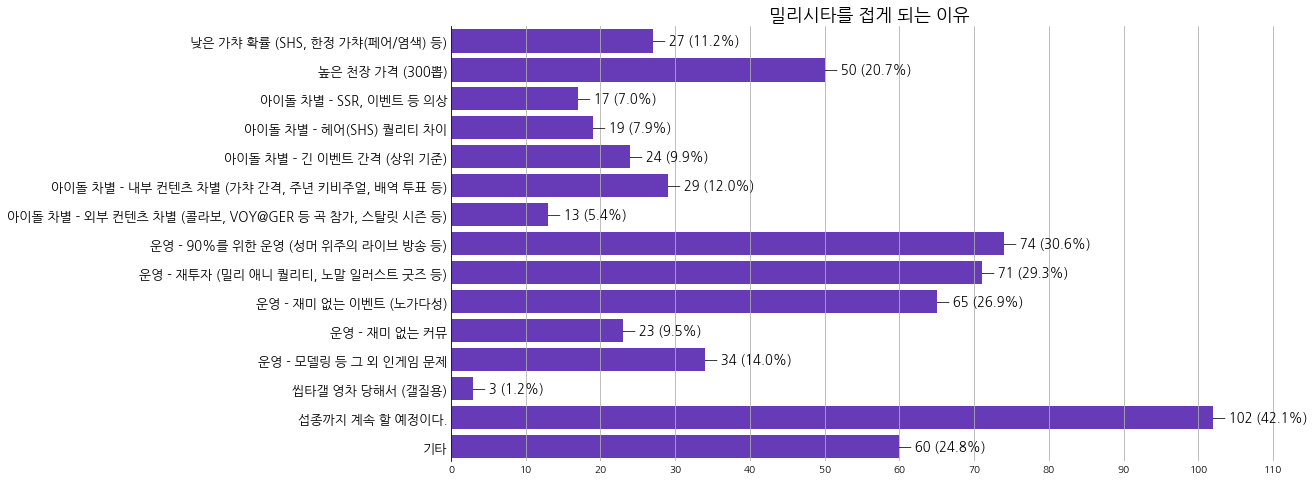

In [41]:
y = list(dislike_counts.keys())[::-1]
x = list(dislike_counts.values())[::-1]

fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
plt.barh(y=y, width=x, color=color)

x_plot_min = 0
x_plot_max = max(x) + 10

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val} ({val/len(df)*100:.1f}%)'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, x_plot_max, 10))
plt.yticks(y, fontsize=13)
plt.ylim((-0.5, len(y)-0.5))
plt.tick_params(length=0)

plt.title(f'밀리시타를 접게 되는 이유', fontsize=18)
plt.show()

# 밀리시타를 접게 되는 가장 중요한 이유

In [42]:
dislike_values = [
    '낮은 가챠 확률 (SHS, 한정 가챠(페어/염색) 등)', '높은 천장 가격 (300뽑)', '아이돌 차별 - SSR, 이벤트 등 의상 퀄리티 차이', '아이돌 차별 - 헤어(SHS) 퀄리티 차이',
    '아이돌 차별 - 긴 이벤트 간격 (상위 기준)', '아이돌 차별 - 내부 컨텐츠 차별 (가챠 간격, 주년 키비주얼, 배역 투표 등)', '아이돌 차별 - 외부 컨텐츠 차별 (콜라보, VOY@GER 등 곡 참가, 스탈릿 시즌 등)',
    '운영 - 90%를 위한 운영 (성머 위주의 라이브 방송 등)', '운영 - 재투자 (밀리 애니 퀄리티, 노말 일러스트 굿즈 등)', '운영 - 재미 없는 이벤트 (노가다성)', 
    '운영 - 재미 없는 커뮤', '운영 - 모델링 등 그 외 인게임 문제', '씹타갤 영차 당해서 (갤질용)', '섭종까지 계속 할 예정이다.', '기타'
]

mst_dislike_counts, etcs = make_counts_etc(df, '위 질문 중 가장 중요한 이유 한 가지만 선택한다면?', dislike_values)

In [43]:
mst_dislike_counts

{'낮은 가챠 확률 (SHS, 한정 가챠(페어/염색) 등)': 6,
 '높은 천장 가격 (300뽑)': 26,
 '아이돌 차별 - SSR, 이벤트 등 의상 퀄리티 차이': 6,
 '아이돌 차별 - 헤어(SHS) 퀄리티 차이': 2,
 '아이돌 차별 - 긴 이벤트 간격 (상위 기준)': 2,
 '아이돌 차별 - 내부 컨텐츠 차별 (가챠 간격, 주년 키비주얼, 배역 투표 등)': 10,
 '아이돌 차별 - 외부 컨텐츠 차별 (콜라보, VOY@GER 등 곡 참가, 스탈릿 시즌 등)': 1,
 '운영 - 90%를 위한 운영 (성머 위주의 라이브 방송 등)': 33,
 '운영 - 재투자 (밀리 애니 퀄리티, 노말 일러스트 굿즈 등)': 33,
 '운영 - 재미 없는 이벤트 (노가다성)': 27,
 '운영 - 재미 없는 커뮤': 0,
 '운영 - 모델링 등 그 외 인게임 문제': 8,
 '씹타갤 영차 당해서 (갤질용)': 0,
 '섭종까지 계속 할 예정이다.': 65,
 '기타': 23}

In [44]:
for etc in etcs:
    print(etc)

군대
분재용
안접음
글로벌 서버 서비스 종료
아이돌삼국지내주ㅜ
현생이 바빠져서
어째서인지 공식으로 만들어지는 결과물 대부분이 재미없다
상동
예전엔 설치만 해 놓은 정도였음
애정 식으면 안할듯
나라가 방해했음..
지갑이 칼들고 협박함
위에와 같다
노래가 제일 중요해
치하야 가슴사이즈 증가
글섭섭종
ㅈㅁ
게임이 너무 느려요
입대
현생
한섭 섭종
유저들이 뭘 좋아하는지도 모르고 능력도 없음
공부


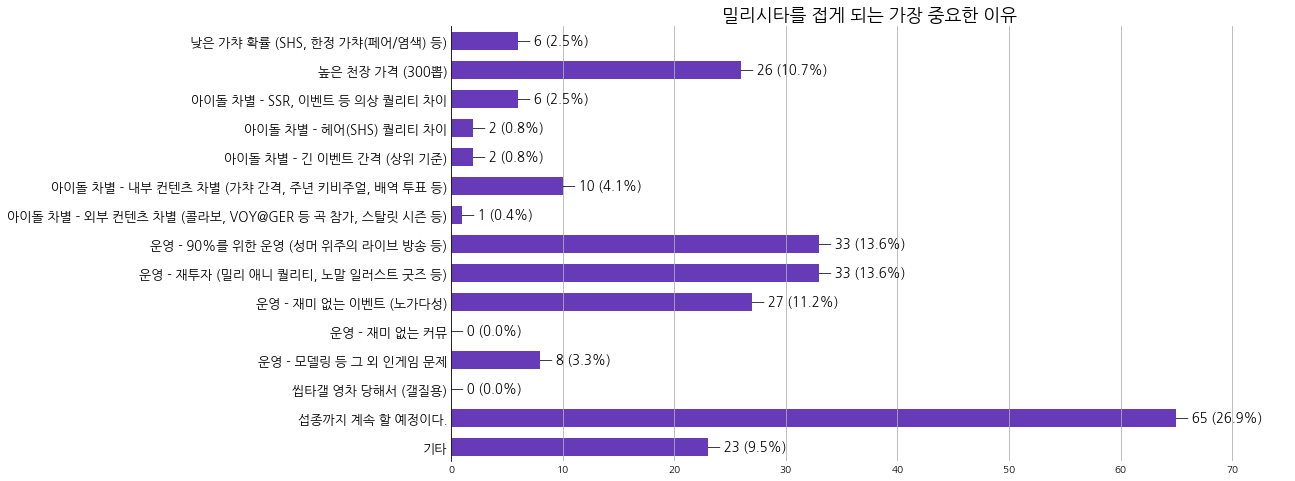

In [45]:
y = list(mst_dislike_counts.keys())[::-1]
x = list(mst_dislike_counts.values())[::-1]

fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
plt.barh(y=y, width=x, color=color, height=0.6)

x_plot_min = 0
x_plot_max = max(x) + 10

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val} ({val/len(df)*100:.1f}%)'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, x_plot_max, 10))
plt.yticks(y, fontsize=13)
plt.ylim((-0.5, len(y)-0.5))
plt.tick_params(length=0)

plt.title(f'밀리시타를 접게 되는 가장 중요한 이유', fontsize=18)
plt.show()

## 플레이 기간 그룹별 가장 중요한 이유

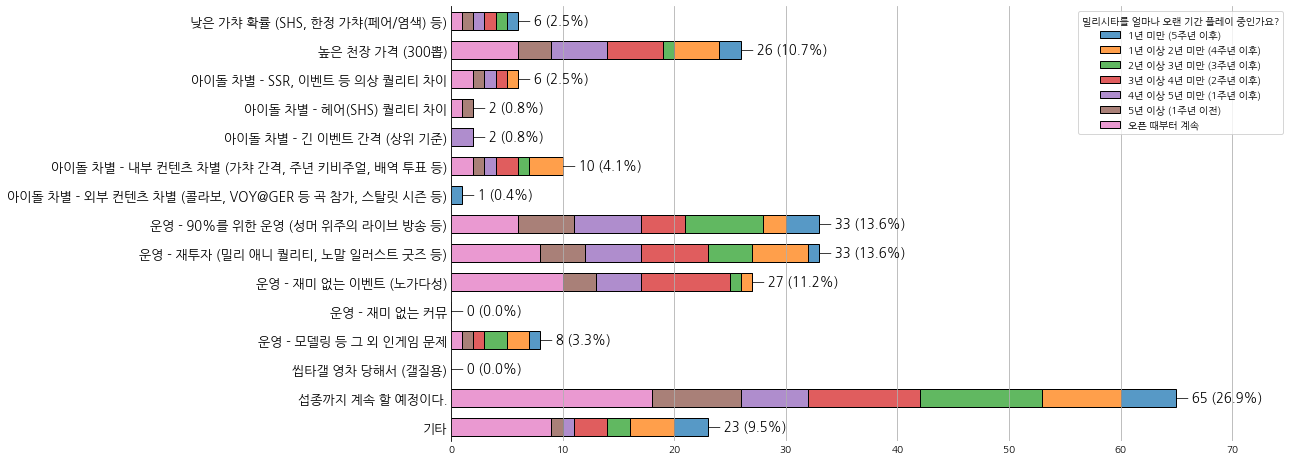

In [46]:
df_play_group_ = df.copy().sort_values(by='밀리시타를 얼마나 오랜 기간 플레이 중인가요?')
for etc in etcs:
    df_play_group_['위 질문 중 가장 중요한 이유 한 가지만 선택한다면?'].replace({etc:'기타'}, inplace=True)
df_play_group_['위 질문 중 가장 중요한 이유 한 가지만 선택한다면?'].replace({'게임이 너무 느려요 ':'기타'}, inplace=True)
df_play_group_['위 질문 중 가장 중요한 이유 한 가지만 선택한다면?'] = pd.Categorical(df_play_group_['위 질문 중 가장 중요한 이유 한 가지만 선택한다면?'], dislike_values)
fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
b = sns.histplot(data=df_play_group_, 
             y='위 질문 중 가장 중요한 이유 한 가지만 선택한다면?',
             hue='밀리시타를 얼마나 오랜 기간 플레이 중인가요?', 
             multiple='stack', shrink=.6,)
b.set_yticklabels(labels=dislike_values, fontsize=13)
b.set_xlim((0, x_plot_max))
b.set_ylim((len(y)-0.5, -0.5))
plt.xlabel('')
plt.ylabel('')
for idx, val in zip(y, x):
    annot = f'─ {val} ({val/len(df)*100:.1f}%)'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.tick_params(length=0)
plt.show()

# 계속하는 이유

In [47]:
continue_values = ['담당 아이돌이 있으니까', '담당 아이돌을 비롯한 여러 아이돌이 있으니까', '곡이 꾸준히 업데이트 되고 노래도 좋아서',
                   '아이마스 IP가 좋아서', '밀리시타보다 괜찮은 씹덕 리듬겜이 없어서', '금전적, 시간적 매몰 비용 때문에', 
                   '운영이 좋아질 거라는 믿음 때문에 (반남과 총괄에 대한 믿음)', '밀리 애니를 믿기 때문에', '유입된 지 얼마 되지 않아서',
                   '기타']

continue_counts, etcs = make_counts_etc(df, '위의 이유에도 불구하고 밀리시타 복귀/계속 하는 이유는?', continue_values)

In [48]:
continue_counts

{'담당 아이돌이 있으니까': 187,
 '담당 아이돌을 비롯한 여러 아이돌이 있으니까': 119,
 '곡이 꾸준히 업데이트 되고 노래도 좋아서': 113,
 '아이마스 IP가 좋아서': 83,
 '밀리시타보다 괜찮은 씹덕 리듬겜이 없어서': 20,
 '금전적, 시간적 매몰 비용 때문에': 25,
 '운영이 좋아질 거라는 믿음 때문에 (반남과 총괄에 대한 믿음)': 5,
 '밀리 애니를 믿기 때문에': 14,
 '유입된 지 얼마 되지 않아서': 5,
 '기타': 16}

In [49]:
for etc in etcs:
    print(etc)

안접음
생각보다 다른 씹덕게임들 또한 병신이었음 그리고 하필 다이아몬드 조커라서
아이돌삼국지내줘
운영은 좋아질 일은 없다. 애니 퀄만 봐도 운영은 밀리마스에 대한 애정이 없는 수준이다. 기대보다는 단념울 하면서 플레이하는 것이다.
갤라운지 들어가고부터 이벤 달리는게 재밌어짐
인생이 마음에 안든다고 죽을 순 없잖아요..
굳이 접을 이유도 없어서
제발 서드헤어 내주세요
오토로 느긋하게해서 부담이 적음
이젠 그냥 생각없이 키게됨
입대라고
진짜 사랑에 이유가 필요 없더라
묘비에 침뱉을려고
관성
이벤트 유기할땐 유기하고 쉬엄쉬엄하기 나쁘진 않아서
그냥


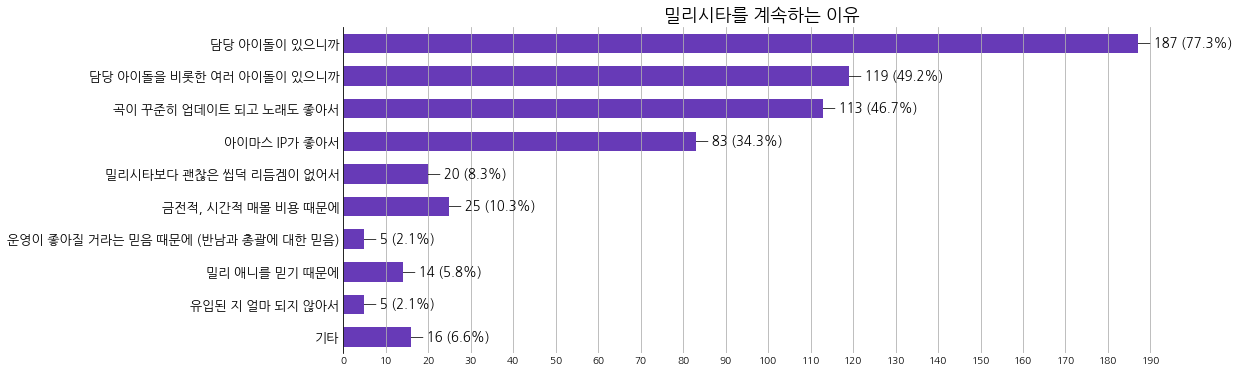

In [50]:
y = list(continue_counts.keys())[::-1]
x = list(continue_counts.values())[::-1]

fig, ax = plt.subplots(figsize=(15, 6), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
plt.barh(y=y, width=x, color=color, height=0.6)

x_plot_min = 0
x_plot_max = max(x) + 10

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val} ({val/len(df)*100:.1f}%)'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, x_plot_max, 10))
plt.yticks(y, fontsize=13)
plt.ylim((-0.5, len(y)-0.5))
plt.tick_params(length=0)

plt.title(f'밀리시타를 계속하는 이유', fontsize=18)
plt.show()

# 다른 게임 출시한다면

In [51]:
if_values = ['밀리시타는 계속 하면서, 다른 게임이 어떤 것이든 일단 해본다.',
             '밀리시타는 계속 하면서, 다른 게임의 장르나 퀄리티에 따라 결정한다.',
             '밀리시타만 계속 한다.', '다른 게임으로 넘어간다.', '기타']

if_counts, etcs = make_counts_etc(df, '밀리언 라이브 IP의 다른 게임이 출시한다면?', if_values)

In [52]:
if_counts

{'밀리시타는 계속 하면서, 다른 게임이 어떤 것이든 일단 해본다.': 142,
 '밀리시타는 계속 하면서, 다른 게임의 장르나 퀄리티에 따라 결정한다.': 70,
 '밀리시타만 계속 한다.': 7,
 '다른 게임으로 넘어간다.': 14,
 '기타': 9}

In [53]:
for etc in etcs:
    print(etc)

반남이라면 안 내고 ip 죽일것 같아요
밀리시타도 이지랄인데 다른겜 내면 잘도 될듯...ㅆㅂ
담당이 나오면 한다
나와봐야 알거같아요
씹타도 하면서 신겜도 할거긴 한데 어차피 얼마 못가서 씹타는 사형당할듯ㅇㅇ
구찮
더 재밌는거 한다
웹게임이면 넘어감
담당있으면 함


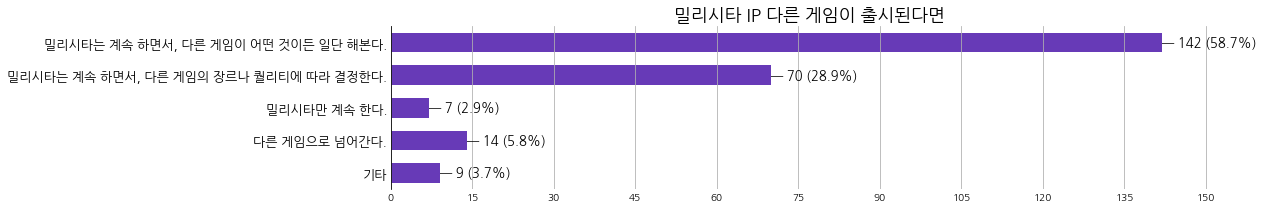

In [54]:
y = list(if_counts.keys())[::-1]
x = list(if_counts.values())[::-1]

fig, ax = plt.subplots(figsize=(15, 3), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
plt.barh(y=y, width=x, color=color, height=0.6)

x_plot_min = 0
x_plot_max = max(x) + 12

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val} ({val/len(df)*100:.1f}%)'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, x_plot_max, 15))
plt.yticks(y, fontsize=13)
plt.ylim((-0.5, len(y)-0.5))
plt.tick_params(length=0)

plt.title(f'밀리시타 IP 다른 게임이 출시된다면', fontsize=18)
plt.show()

## 다른 게임 출시한다면 - 애정도 관계

In [55]:
if_df = df_org.copy()

if_df.loc[~if_df['밀리언 라이브 IP의 다른 게임이 출시한다면?'].isin(if_values), '밀리언 라이브 IP의 다른 게임이 출시한다면?'] = '기타'

In [56]:
if_df_group = if_df.groupby(['밀리언 라이브 IP의 다른 게임이 출시한다면?']).mean()[['밀리시타에 대한 애정도를 숫자로 표현한다면?']].loc[if_values]
if_df_group

,밀리시타에 대한 애정도를 숫자로 표현한다면?
밀리언 라이브 IP의 다른 게임이 출시한다면?,
"밀리시타는 계속 하면서, 다른 게임이 어떤 것이든 일단 해본다.",8.126761
"밀리시타는 계속 하면서, 다른 게임의 장르나 퀄리티에 따라 결정한다.",7.400000
밀리시타만 계속 한다.,8.285714
다른 게임으로 넘어간다.,4.857143
기타,5.777778


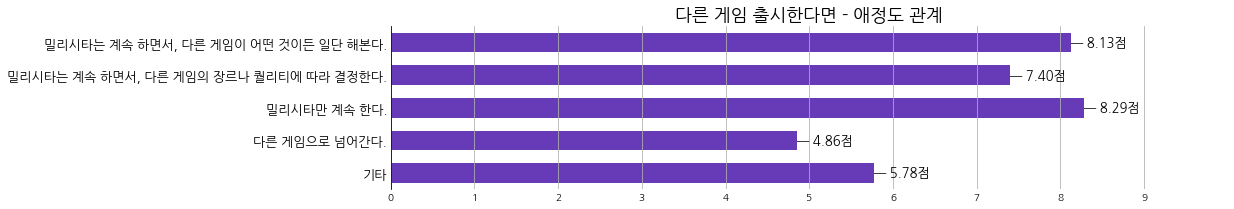

In [57]:
y = list(if_df_group.index)[::-1]
x = list(if_df_group.iloc[:,0].values)[::-1]

fig, ax = plt.subplots(figsize=(15, 3), facecolor='white')
for location in ['right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0)
plt.barh(y=y, width=x, color=color, height=0.6)

x_plot_min = 0
x_plot_max = 10

plt.xlim((x_plot_min, x_plot_max))

# annotate
for idx, val in zip(y, x):
    annot = f'─ {val:.2f}점'
    plt.annotate(text=annot, xy=(val, idx), ha='left', va='center', fontsize=13)

plt.grid(axis='x')
plt.xticks(range(x_plot_min, x_plot_max, 1))
plt.yticks(y, fontsize=13)
plt.ylim((-0.5, len(y)-0.5))
plt.tick_params(length=0)

plt.title(f'다른 게임 출시한다면 - 애정도 관계', fontsize=18)
plt.show()